# **Assignment 1 : Principle Component Analysis on Museum Image Data 🏛️** 

In this Assignment we will learn how to apply Principle Components Analysis (PCA) to reduce the dimensionality of an image dataset.

You are an image processing scientist in Ellis Island Museum, your job is to build a fastly trained model to automate digit recognition from millions of historical images. The museum authorities handed you input image data under the form of a matrix of 8x8 where each image represent a single digit from 0 to 9 (10-Class Classification).
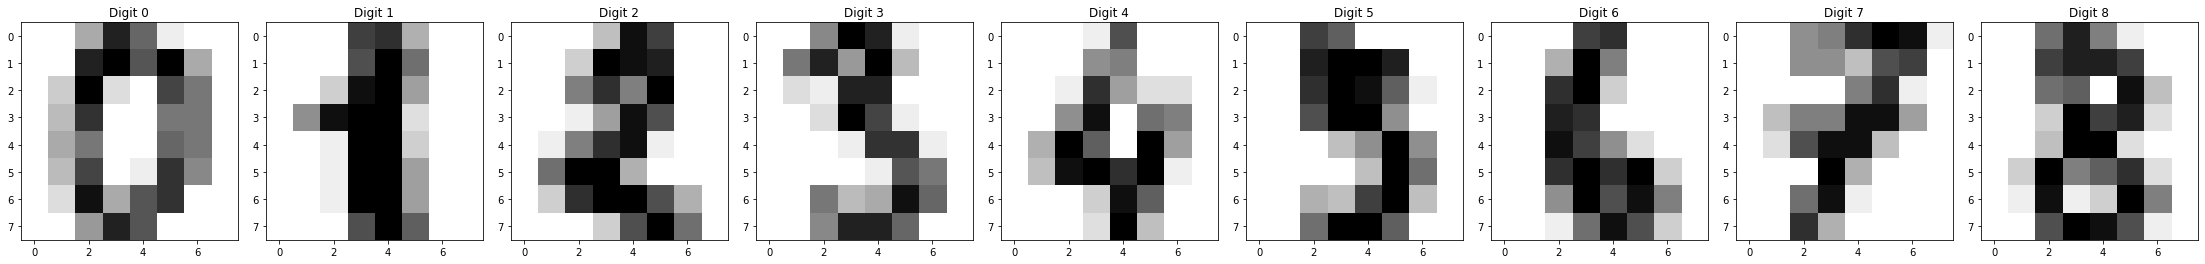

In [8]:
# Import Needed Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, preprocessing
import time

# Load digit dataset and labels
digits = load_digits()
data = digits.data
labels = digits.target

# Normalize the data using mean normalization as a preprocessing step
data = X_std = StandardScaler().fit_transform(data)

In [9]:
# Function that return the SVD matrix decomposition of an imput data matrix
def svd(X):
  # Compute full SVD
  U, Sigma, V = np.linalg.svd(X, 
      full_matrices=False, 
      compute_uv=True)
  # Transform X with SVD components
  return U, np.diag(Sigma), V 

**Question 1:**
We have seen in class that the choice of number of principle components is justified by the variance that the PC are contributing with. We were able to establish that the cumulative variance using k principle components can be computed as follows:

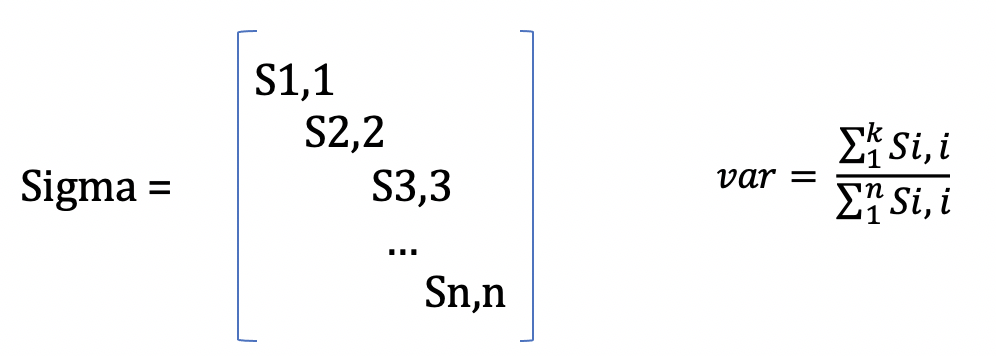

Write a function that compute the cumultive variance using k principle components


In [23]:
# Function that returns the cumulative variance achieved 
# with "k" principle components and returns it.

def computeVariance(k, Sigma):
    variance = np.sum(Sigma[0:k])/np.sum(Sigma)
    return varicance
  # INSERT CODE HERE

**Question 2:** Call the computeVariance function on different k rangeing from 1-64 and plot the cumulative variance plot as follow:

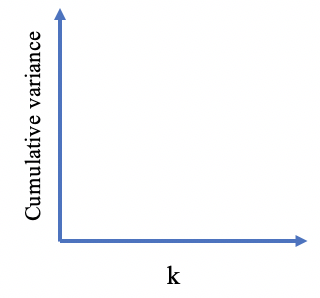

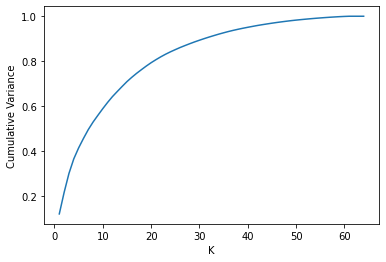

In [39]:
var_lst = []
for i in range(1,65):
   var_lst = computeVariance(i, data)
k_lst = []
for i in range(1,65):
    k_lst.append(i)

plt.xlabel("K")
plt.ylabel("Cumulative Variance")
plt.plot(k_lst,var_lst)




**Question 3:** Let's plot the result of PCA projection in 3D to visualize how the space is separated using the best three principle components versus random principle components.

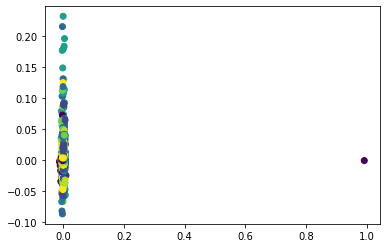

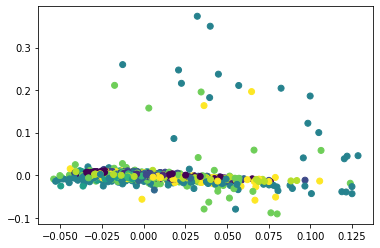

In [47]:
# The projected data is formed by the dot product of U and V  (use np.dot())
U, Sigma, V = svd(data)
X_svd = np.dot(U,V)

# Plot the 2 best PCA using a scatter plot 
# Hint: X_svd[: , 0:1] is the best/first PCA 

plt.scatter(X_svd[:, 0:1],X_svd[:, 1:2],
            c=labels)
plt.show()

# Plot 2 random principle components from X_svd (e.g., columns 23 and 24) using a scatter plot
plt.scatter(X_svd[:, 22:23],X_svd[:, 23:24],
            c=labels)
plt.show()

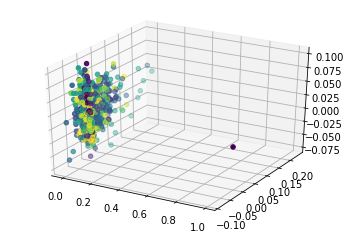

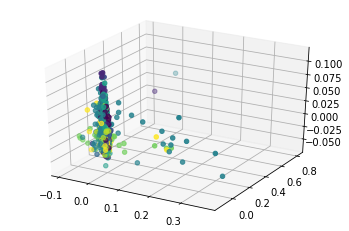

In [46]:
# Plot the 3 best PCA using a 3D scatter plot 
# Hint: X_svd[: , 0:1] is the first PCA 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0:1],X_svd[:, 1:2],X_svd[:, 2:3],
           c=labels)
plt.show()

# Plot 3 random PCA (e.g., columns number 23,24 and 25) using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 23:24],X_svd[:, 24:25],X_svd[:, 25:26],
           c=labels)
plt.show()


**Question 4:**
Train a Decision Tree Classifier using 10 fold cross validation on :
*   Original Data (data)
*   Reduced Data that provide minimm of 0.75 variance (X_svd[ :, 1:k])

Specify both:

*   Training time for the Decision Model
*   Average accuracy across the 10-folds







In [66]:
# Train DT model on original data
start = time.time()
clf = DecisionTreeClassifier(random_state=0)
cv = cross_val_score(clf, data, labels, cv=10)
end = time.time()
ttime = str(end-start)

# Print the total train time AND average cross validation accuracy
total = 0
average = 0
for i in range(len(cv)):
  total += cv[i]

average = total/len(cv)

print("Average non-reduced : ")
print(average)
print("Time non-reduced : ")  
print(ttime)




# Train DT model on reduced data ,
# hint: use X_svd[: , 0:k], with k that provides 0.75 variance that you computed in Question 2 
start2 = time.time()
clf2 = DecisionTreeClassifier(random_state=0)
cv2 = cross_val_score(clf2, X_svd[:, 0:15], labels, cv=10)
end2 = time.time()
ttime2 = str(end2-start2)
total2 = 0
average2 = 0
for i in range(len(cv)):
  total2 += cv[i]

average2 = total/len(cv)

# Print the total train time AND average cross validation accuracy
print("Average reduced : ")
print(average2)
print("Time reduced : ")  
print(ttime2)


Average non-reduced : 
0.8246803227808815
Time non-reduced : 
0.20649409294128418
Average reduced : 
0.8246803227808815
Time reduced : 
0.3046684265136719
